In [114]:
pip install split-folders[full]

In [115]:
import splitfolders
input_folder = "C:\\Users\\Admin\\Downloads\\Healthcare-images-classification-20221006T055456Z-001\\Healthcare-images-classification"
splitfolders.ratio(input_folder, output="dataset", 
                   seed=42, ratio=(.6, .3, .1), 
                   group_prefix=None)


Copying files: 101 files [00:00, 241.93 files/s]


In [116]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [117]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory("C:\\Users\\Admin\\dataset\\train",
                                                 target_size = (64, 64),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

Found 69 images belonging to 4 classes.


In [118]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory("C:\\Users\\Admin\\dataset\\val",
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 39 images belonging to 4 classes.


In [119]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
    
])

# Print the model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 6, 6, 128)      

In [120]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [127]:
history = model.fit(training_set, epochs=40, validation_data = val_set)

Epoch 1/40
69/69 [==============================] - 4s 58ms/step - loss: 0.7691 - accuracy: 0.8696 - val_loss: 7.3445 - val_accuracy: 0.7692
Epoch 2/40
69/69 [==============================] - 4s 63ms/step - loss: 1.2022 - accuracy: 0.8551 - val_loss: 21.9099 - val_accuracy: 0.8462
Epoch 3/40
69/69 [==============================] - 4s 61ms/step - loss: 0.6071 - accuracy: 0.8696 - val_loss: 29.8758 - val_accuracy: 0.8462
Epoch 4/40
69/69 [==============================] - 4s 61ms/step - loss: 1.2431 - accuracy: 0.8551 - val_loss: 7.0709 - val_accuracy: 0.8462
Epoch 5/40
69/69 [==============================] - 4s 60ms/step - loss: 1.0698 - accuracy: 0.8551 - val_loss: 30.2071 - val_accuracy: 0.8462
Epoch 6/40
69/69 [==============================] - 4s 56ms/step - loss: 3.8398 - accuracy: 0.8116 - val_loss: 12.1692 - val_accuracy: 0.8462
Epoch 7/40
69/69 [==============================] - 4s 59ms/step - loss: 0.9848 - accuracy: 0.8551 - val_loss: 4.9761 - val_accuracy: 0.8462
Epoch 8/4

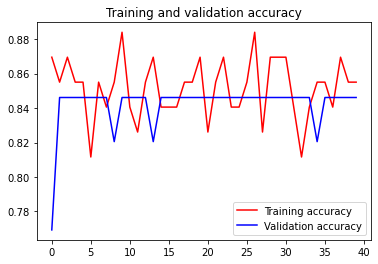

<Figure size 432x288 with 0 Axes>

In [128]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [129]:
import numpy as np

from tensorflow.keras.utils import load_img, img_to_array
img = load_img("C:\\Users\\Admin\\dataset\\test\\Report\\image23.jpeg", target_size=(64, 64))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)
if classes[0][0]==1:
    print('BCG')
if classes[0][1]==1:
    print('Prescription')
if classes[0][2]==1:
    print('Report')
else:
    print('X-Ray')

1/1 [==============================] - 0s 16ms/step
Report
